In [1]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Construct a Pipeline from the given estimators.
from sklearn.pipeline import make_pipeline


from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:

path = "C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\Reviews_cleaned.csv"

reviews = pd.read_csv(path)

reviews.head(2)

,Reviewer_Score,review
0,0,park outside hotel beautiful angry make post a...
1,1,no real complaint hotel great great location s...


In [3]:
reviews['Reviewer_Score'].value_counts(normalize = True)

1    0.782609
0    0.217391
Name: Reviewer_Score, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split


X = reviews.drop(['Reviewer_Score'], axis = 1)
y = reviews['Reviewer_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 0)

In [5]:
print("\n")
print("X_train:", type(X_train), X_train.shape) 

# AJS:
print("\n")
print("X_test", type(X_test), X_test.shape) 

print("\n")
print("y_train", type(y_train), y_train.shape) 

print("\n")
print("y_test", type(y_test), y_test.shape) 




X_train: <class 'pandas.core.frame.DataFrame'> (386803, 1)


X_test <class 'pandas.core.frame.DataFrame'> (128935, 1)


y_train <class 'pandas.core.series.Series'> (386803,)


y_test <class 'pandas.core.series.Series'> (128935,)


In [6]:
print("\n")
print("X_train:", X_train.head(3)) 

# AJS:
print("\n")
print("X_test", X_test.head(3)) 

print("\n")
print("y_train",  y_train.head(3)) 

print("\n")
print("y_test", y_test.head(3)) 




X_train:                                                    review
150921  minibar fruit basket clean sheet clean toilet ...
299878  hotel reception lovely think pay view harbour ...
440101  location perfect walk around shop food staff f...


X_test                                                    review
90246   personal polite really old hotel rather proper...
198661                                  look well nothing
489012  clean nice room wait long check bit really fau...


y_train 150921    1
299878    0
440101    1
Name: Reviewer_Score, dtype: int64


y_test 90246     0
198661    1
489012    1
Name: Reviewer_Score, dtype: int64


In [7]:
y_train.value_counts(normalize = True)

1    0.782608
0    0.217392
Name: Reviewer_Score, dtype: float64

In [8]:
y_test.value_counts(normalize = True)

1    0.782611
0    0.217389
Name: Reviewer_Score, dtype: float64

### Vectorizations

In [9]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 3), max_df=0.5)

count_vectorizer.fit(X_train['review'])

X_train_cv_vectors = count_vectorizer.transform(X_train['review'])
X_test_cv_vectors = count_vectorizer.transform(X_test['review'])

print("Train Vector Shape")
print(X_train_cv_vectors.shape)
print("Test Vector Shape")
print(X_test_cv_vectors.shape)

# Print the first 10 features of the count_vec
# print("Every feature:\n{}".formMat(count_vectorizer.get_feature_names()))
list(count_vectorizer.vocabulary_)[:10]


X_train_cv_vectors.dtype


Train Vector Shape
(386803, 5618607)
Test Vector Shape
(128935, 5618607)
Wall time: 1min 11s


dtype('int64')

In [10]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# word level
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_df=0.5)

tfidf.fit(X_train['review'])

X_train_tf_vector = tfidf.transform(X_train['review'])
X_test_tf_vector = tfidf.transform(X_test['review'])

print("Train Vector Shape")
print(X_train_tf_vector.shape)
print("Test Vector Shape")
print(X_test_tf_vector.shape)

list(tfidf.vocabulary_)[:10]

Train Vector Shape
(386803, 5618607)
Test Vector Shape
(128935, 5618607)
Wall time: 1min 14s


['minibar',
 'fruit',
 'basket',
 'clean',
 'sheet',
 'toilet',
 'no',
 'negative',
 'minibar fruit',
 'fruit basket']

### Over Sampling

##### For Count Vectorizer

In [11]:
# !pip uninstall scikit-learn
# print("Done")


In [12]:
# pip install scikit-learn
# print("Done")


In [13]:
# pip install --upgrade sklearn==0.23. 2
import joblib as jb
print("Done")




Done


In [15]:
%time
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus_cv, y_rus_cv, = rus.fit_resample(X_train_cv_vectors, y_train)
print("Done")


Wall time: 0 ns
Done


In [16]:
X_rus_cv.shape, y_rus_cv.shape

((168176, 5618607), (168176,))

In [17]:
y_rus_cv.value_counts(normalize = True)

0    0.5
1    0.5
Name: Reviewer_Score, dtype: float64

In [19]:
y_rus_cv.dtype

dtype('int64')

In [20]:
%%time
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_smote_cv, y_smote_cv = smote.fit_resample(X_train_cv_vectors, y_train)
print("Done")



Done
Wall time: 4min 41s


In [21]:
X_smote_cv.shape, y_smote_cv.shape


((605430, 5618607), (605430,))

In [22]:
y_smote_cv.value_counts(normalize = True)

1    0.5
0    0.5
Name: Reviewer_Score, dtype: float64

In [23]:
X_smote_cv.dtype


dtype('int64')

##### For TFIDF

In [24]:
%%time
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_smote_tf, y_smote_tf = smote.fit_resample(X_train_tf_vector, y_train)
print("Done")



Done
Wall time: 4min 41s


In [25]:
X_smote_tf.shape, y_smote_tf.shape

((605430, 5618607), (605430,))

In [26]:
y_smote_tf.value_counts(normalize = True)

1    0.5
0    0.5
Name: Reviewer_Score, dtype: float64

In [27]:
%%time
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus_tf, y_rus_tf, = rus.fit_resample(X_train_tf_vector, y_train)
print("Done")


Done
Wall time: 611 ms


In [28]:
X_rus_tf.shape, y_rus_tf.shape

((168176, 5618607), (168176,))

In [29]:
y_rus_tf.value_counts(normalize = True)

0    0.5
1    0.5
Name: Reviewer_Score, dtype: float64

## Models

In [30]:
def showModelEvaluation(y_test,predictions):
    print("precision_score1:",precision_score(y_test, predictions) )
    print("recall_score1:",recall_score(y_test, predictions))
    print("f1_score1:",f1_score(y_test, predictions))
    print("roc_auc score",roc_auc_score(y_test, predictions) )
    print("")

    print("[Test Classification Report]") 
    print(classification_report(y_test, predictions))
    print("")
    
    #condusion metrics
    cm = confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(predictions, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)


    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [31]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

##### Naive Bayes on CV Under Sampler

In [32]:
%time nb.fit(X_rus_cv, y_rus_cv)

Wall time: 514 ms


MultinomialNB()

In [33]:
y_test_cv_rus_pred = nb.predict(X_test_cv_vectors)

precision_score1: 0.9458653599403664
recall_score1: 0.7670802529086477
f1_score1: 0.8471426460689836
roc_auc score 0.8045148312243835

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.50      0.84      0.63     28029
           1       0.95      0.77      0.85    100906

    accuracy                           0.78    128935
   macro avg       0.72      0.80      0.74    128935
weighted avg       0.85      0.78      0.80    128935




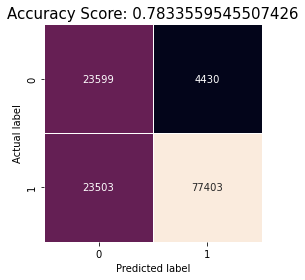

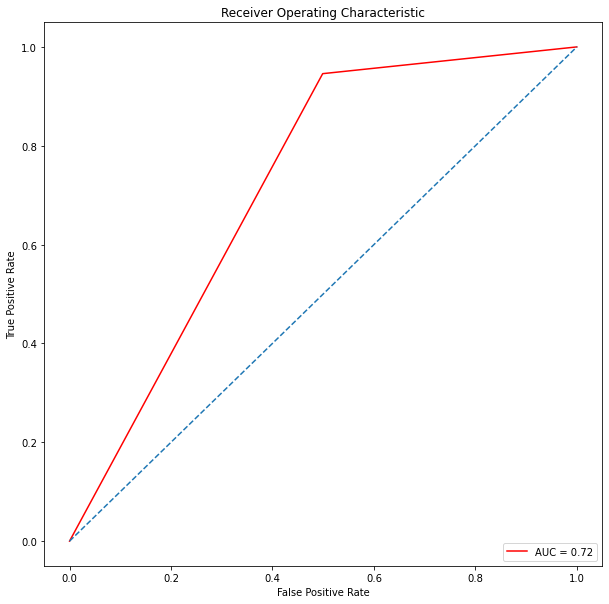

In [85]:
showModelEvaluation(y_test, y_test_cv_rus_pred)

##### Naive Bayes on CV Smote

In [35]:
%time nb.fit(X_smote_cv, y_smote_cv)

Wall time: 792 ms


MultinomialNB()

In [36]:
y_test_cv_smote_pred = nb.predict(X_test_cv_vectors)

precision_score1: 0.8914419011517714
recall_score1: 0.9089251382474779
f1_score1: 0.9000986304596376
roc_auc score 0.7552224963419772

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     28029
           1       0.89      0.91      0.90    100906

    accuracy                           0.84    128935
   macro avg       0.77      0.76      0.76    128935
weighted avg       0.84      0.84      0.84    128935




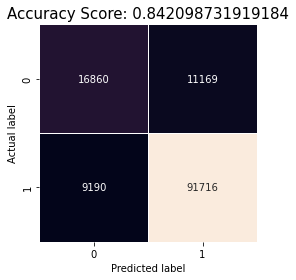

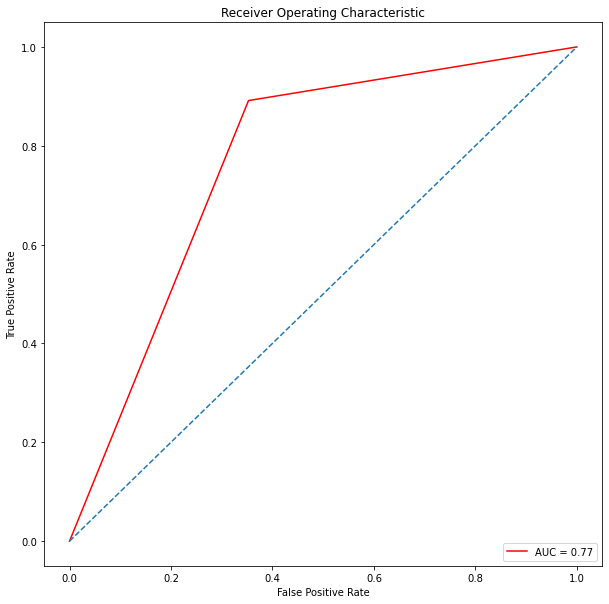

In [37]:
showModelEvaluation(y_test, y_test_cv_smote_pred)

##### Naive Bayes on tfidf Smote

In [38]:
%time nb.fit(X_smote_tf, y_smote_tf)

Wall time: 851 ms


MultinomialNB()

In [39]:
y_test_tf_smote_pred = nb.predict(X_test_tf_vector)

precision_score1: 0.8996799133303787
recall_score1: 0.9052880899054566
f1_score1: 0.9024752890965763
roc_auc score 0.7709393819251498

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64     28029
           1       0.90      0.91      0.90    100906

    accuracy                           0.85    128935
   macro avg       0.78      0.77      0.77    128935
weighted avg       0.85      0.85      0.85    128935




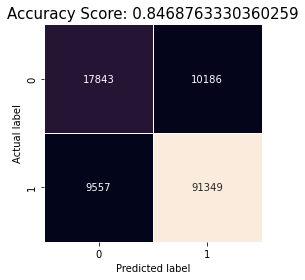

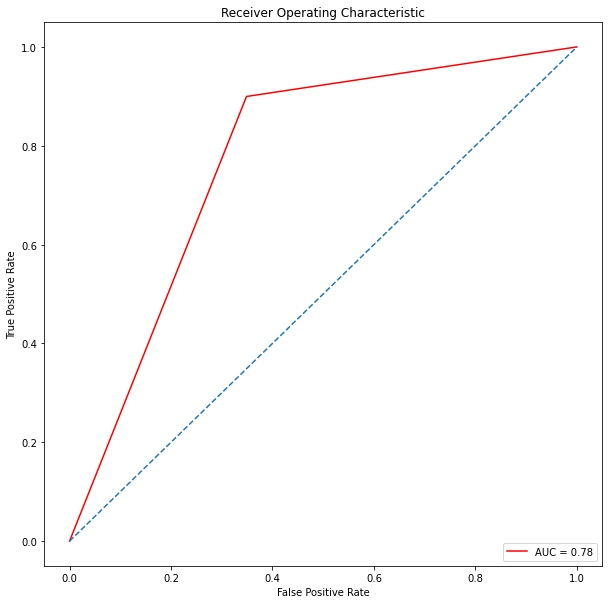

In [40]:
showModelEvaluation(y_test, y_test_tf_smote_pred)

In [41]:
%time nb.fit(X_rus_tf, y_rus_tf)

Wall time: 379 ms


MultinomialNB()

In [42]:
y_test_tf_rus_pred = nb.predict(X_test_tf_vector)

precision_score1: 0.9486607962965231
recall_score1: 0.7676550452896755
f1_score1: 0.8486133250072578
roc_auc score 0.8090478301834585

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.50      0.85      0.63     28029
           1       0.95      0.77      0.85    100906

    accuracy                           0.79    128935
   macro avg       0.73      0.81      0.74    128935
weighted avg       0.85      0.79      0.80    128935




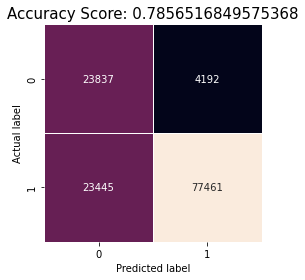

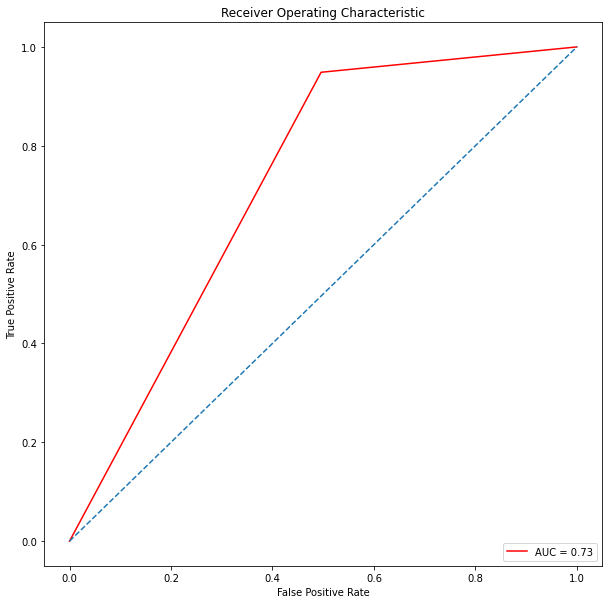

In [43]:
showModelEvaluation(y_test, y_test_tf_rus_pred)

##### XGBoost

In [44]:
import xgboost as xgb

xb = xgb.XGBClassifier()

xb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [45]:
xb_param_grid = {        
                 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                 "max_depth"        : [ 3, 5, 6, 8],
                 "min_child_weight" : [ 1, 3, 5, 7],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [46]:
xg_r = RandomizedSearchCV(param_distributions = xb_param_grid, 
                                    estimator = xb, scoring = "f1", 
                                    verbose = 0, n_iter = 10, cv = 5)

In [47]:
%time xg_r.fit(X_rus_cv, y_rus_cv)

Wall time: 1h 46min 49s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1')

In [48]:
%time

xg_bp = xg_r.best_params_

print(f"Best Parameters: {xg_bp}")

print(f"Best Score: {xg_r.best_score_}")

Wall time: 0 ns
Best Parameters: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.4, 'colsample_bytree': 0.5}
Best Score: 0.7955698577690196


In [49]:
%time
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

Wall time: 0 ns


In [50]:
%time xg_classifier.fit(X_rus_cv, y_rus_cv)

Wall time: 2min 48s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
y_test_cv_rus_pred = xg_classifier.predict(X_test_cv_vectors)

precision_score1: 0.9458653599403664
recall_score1: 0.7670802529086477
f1_score1: 0.8471426460689836
roc_auc score 0.8045148312243835

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.50      0.84      0.63     28029
           1       0.95      0.77      0.85    100906

    accuracy                           0.78    128935
   macro avg       0.72      0.80      0.74    128935
weighted avg       0.85      0.78      0.80    128935




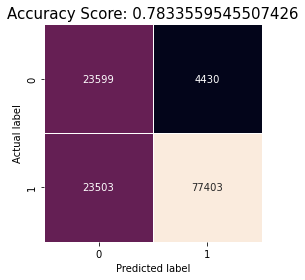

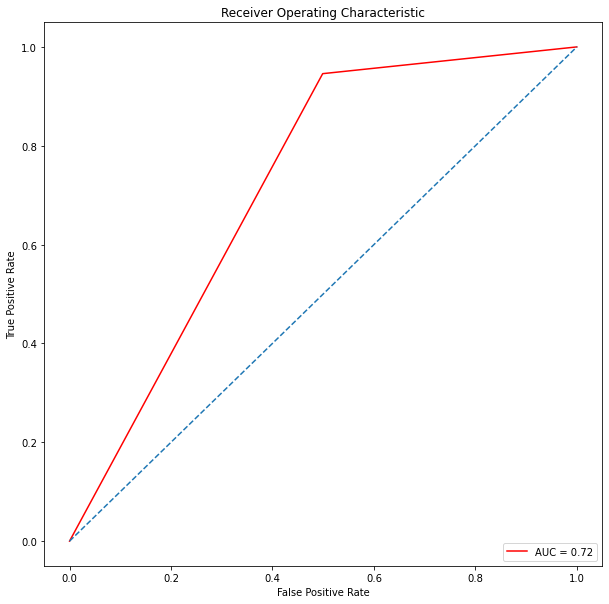

In [52]:
showModelEvaluation(y_test, y_test_cv_rus_pred)

##### XGBoost with Counte Vectorizer Sampled by Smote

In [53]:
%time xg_r.fit(X_smote_cv, y_smote_cv)

Wall time: 2h 25min 4s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1')

In [54]:
%time

xg_bp = xg_r.best_params_

print(f"Best Parameters: {xg_bp}")

print(f"Best Score: {xg_r.best_score_}")

Wall time: 0 ns
Best Parameters: {'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.5}
Best Score: 0.882771873844271


In [55]:
%time
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

Wall time: 0 ns


In [56]:
%time xg_classifier.fit(X_smote_cv, y_smote_cv)

Wall time: 3min 41s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [57]:
y_test_cv_smote_pred = xg_classifier.predict(X_test_cv_vectors)

precision_score1: 0.8719924253675925
recall_score1: 0.9309456325689255
f1_score1: 0.9005051909084809
roc_auc score 0.7194775970472442

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.67      0.51      0.58     28029
           1       0.87      0.93      0.90    100906

    accuracy                           0.84    128935
   macro avg       0.77      0.72      0.74    128935
weighted avg       0.83      0.84      0.83    128935




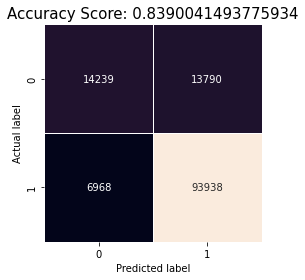

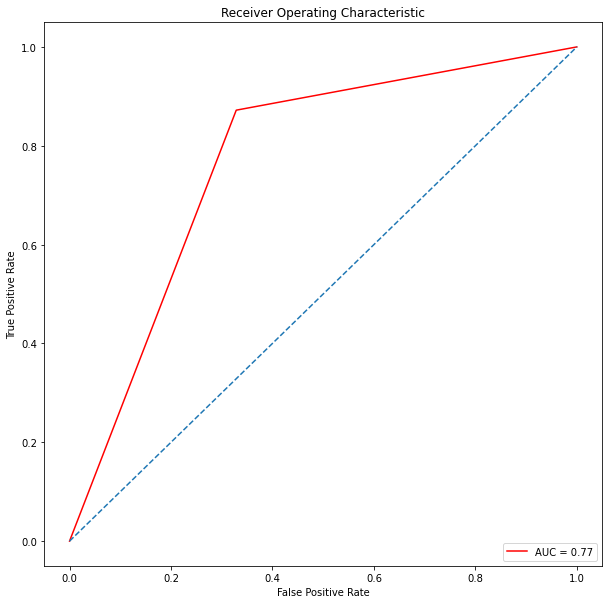

In [58]:
showModelEvaluation(y_test, y_test_cv_smote_pred)

###### XGBoost with TFIDF RUS

In [59]:
%time xg_r.fit(X_rus_tf, y_rus_tf)

Wall time: 2h 21min 50s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1')

In [60]:
%time

xg_bp = xg_r.best_params_

print(f"Best Parameters: {xg_bp}")

print(f"Best Score: {xg_r.best_score_}")

Wall time: 0 ns
Best Parameters: {'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.4}
Best Score: 0.7861404228407274


In [61]:
%time
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

Wall time: 0 ns


In [62]:
%time xg_classifier.fit(X_rus_tf, y_rus_tf)

Wall time: 2min 51s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
y_test_tf_rus_pred = xg_classifier.predict(X_test_tf_vector)

precision_score1: 0.9390854976394876
recall_score1: 0.7707767625314649
f1_score1: 0.8466474715202446
roc_auc score 0.7953923057724933

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.50      0.82      0.62     28029
           1       0.94      0.77      0.85    100906

    accuracy                           0.78    128935
   macro avg       0.72      0.80      0.73    128935
weighted avg       0.84      0.78      0.80    128935




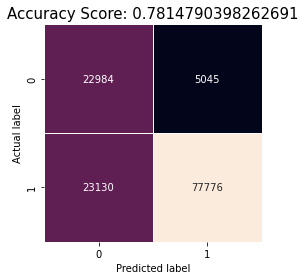

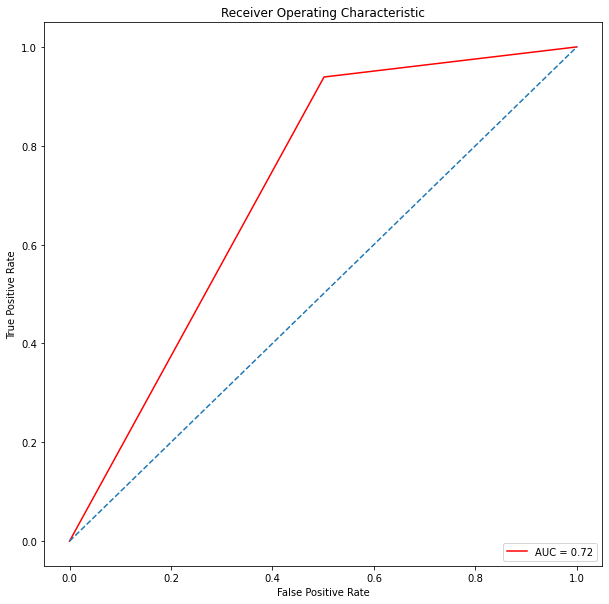

In [64]:
showModelEvaluation(y_test, y_test_tf_rus_pred)

###### XGBoost with TFIDF SMOTE

In [65]:
%time xg_r.fit(X_smote_tf, y_smote_tf)

Wall time: 2h 55min 38s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1')

In [66]:
%time

xg_bp = xg_r.best_params_

print(f"Best Parameters: {xg_bp}")

print(f"Best Score: {xg_r.best_score_}")

Wall time: 0 ns
Best Parameters: {'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best Score: 0.8466254028345727


In [67]:
%time
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

Wall time: 0 ns


In [68]:
%time xg_classifier.fit(X_smote_tf, y_smote_tf)

Wall time: 7min 46s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
y_test_tf_smote_pred = xg_classifier.predict(X_test_tf_vector)

precision_score1: 0.8824993411998946
recall_score1: 0.8960815015955443
f1_score1: 0.8892385612076806
roc_auc score 0.733281037643539

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.60      0.57      0.59     28029
           1       0.88      0.90      0.89    100906

    accuracy                           0.83    128935
   macro avg       0.74      0.73      0.74    128935
weighted avg       0.82      0.83      0.82    128935




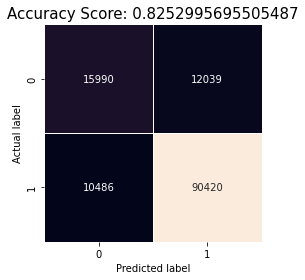

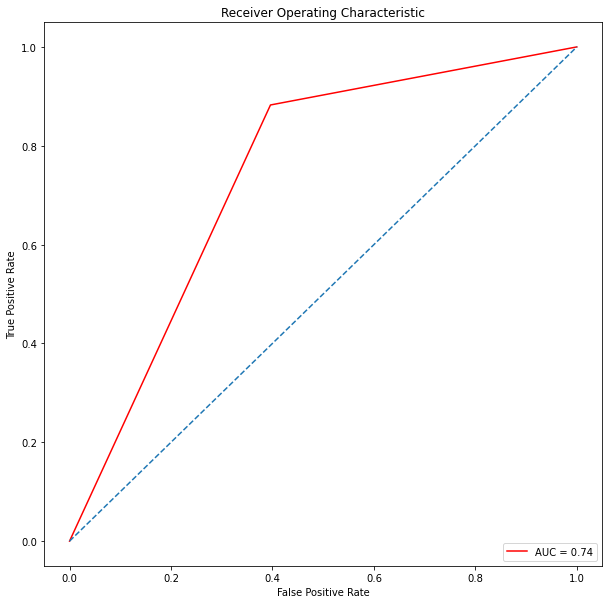

In [70]:
showModelEvaluation(y_test, y_test_tf_smote_pred)

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [72]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,10),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False]}

# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(rf, param_distributions=rf_param_grid, cv = 3, n_iter=10,verbose=1)

# Train on training data-
rs_cv.fit(X_rus_cv, y_rus_cv)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hanna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hanna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hanna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 10, 18],
                                        'min_samples_split': [2, 3, 10, 20],
                                        'n_estimators': range(1, 10)},
                   verbose=1)

In [74]:
print('Best score reached: {} with params: {} '.format(rs_cv.best_score_, rs_cv.best_params_))

Best score reached: 0.5868914979473033 with params: {'n_estimators': 8, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': False} 


In [75]:
rf_bp = rs_cv.best_params_

In [76]:
rf_classifier = RandomForestClassifier(n_estimators = rf_bp["n_estimators"],
                                     min_samples_split = rf_bp['min_samples_split'],
                                     min_samples_leaf = rf_bp['min_samples_leaf'],
                                     max_features = rf_bp['max_features'],
                                     max_depth = rf_bp['max_depth'],
                                     bootstrap = rf_bp['bootstrap'])

In [77]:
rf_classifier.fit(X_rus_cv, y_rus_cv)

C:\Users\hanna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=8, max_features='auto',
                       min_samples_leaf=3, n_estimators=8)

In [78]:
y_test_cv_rus_pred_rf = rf_classifier.predict(X_test_cv_vectors)
y_test_cv_rus_pred

array([0, 1, 1, ..., 1, 0, 0])

precision_score1: 0.9106098745366975
recall_score1: 0.8031571770711327
f1_score1: 0.8535148993089099
roc_auc score 0.591164933087841

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.20      0.38      0.26     14529
           1       0.91      0.80      0.85    114406

    accuracy                           0.76    128935
   macro avg       0.55      0.59      0.56    128935
weighted avg       0.83      0.76      0.79    128935




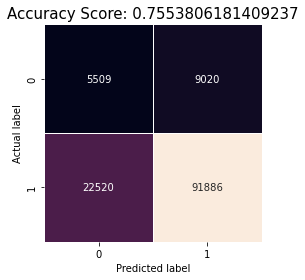

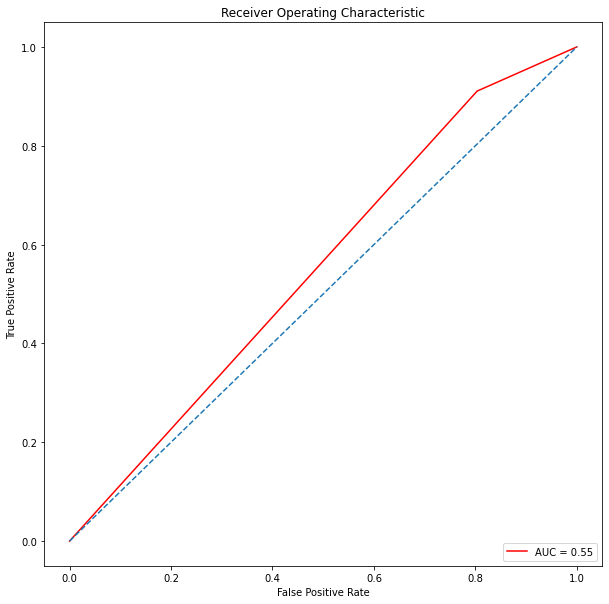

In [86]:
showModelEvaluation(y_test_cv_rus_pred_rf, y_test)